In [1]:
from google.colab import drive
import os
import pandas as pd
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/CSCI 447. Stroke Prediction'

/content/drive/.shortcut-targets-by-id/1xvQAgQEPYaoelmQqzFj4fR79l2RT2k2G/CSCI 447. Stroke Prediction


In [3]:
df = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0)

In [4]:
history_of_cvd = ['CHF', 'pulmonary edema', 'external drainage', 'blockade',
                   'atherosclerosis', 'infarction cerebral',
                   'cardiac dysrhythmia', 'mitral valve replacement',
                   'fibrinolysis', 'cardiosclerosis', 'ihd',
                   'secondary dilatation syndrome', 'circulatory failure',
                   'diabetes type 2', 'right sided hemipfresis',
                   'combined heart disease', 'cardiomyopathy',
                   'dyscirculatory encephalopathy', 'angina', 'chd',
                   'infarction myocardial', 'mitral defect',
                   'degenerative calcification', 'aortic defect',
                   'ischemic stroke', 'thromboembolism',
                   'rheumatic heart disease']

In [5]:
# df.columns
columns = ['Patient Number', 'Age', 'Gender', 'Death (yes/no)',
           'History of IHD (yes/no)', 'History of Diabetes Mellitus (yes/no)',
           'Area of stroke', 'Arterial hypertension', 'Risk == 4', 'glascow',
           'averageBloodPresure', 'glucocorticosteroids 0->no, 1->predni, 2->dexa',
           'stroke diagnosis (ischemic/hemorrhagic) on admission',
           'History of A-Fibrillation (yes/no)', 'History of Metabolic Syndrome (yes/no)',
           'History of Chronic Renal Failure (yes/no)',
           'History of Chronic Liver Failure (yes/no)'] + history_of_cvd

In [6]:
df = df[columns]
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.rename(columns={
    'death_(yes/no)': 'death',
    'history_of_ihd_(yes/no)': 'history_of_ihd',
    'risk_==_4': 'risk==4',
    'glucocorticosteroids_0->no,_1->predni,_2->dexa': 'glucocorticosteroids',
    'history_of_diabetes_mellitus_(yes/no)': 'history_of_diabetes',
    'glascow': 'glascow_coma_score',
    'stroke_diagnosis_(ischemic/hemorrhagic)_on_admission': 'stroke_type',
    'averagebloodpresure': 'average_blood_pressure'
})

In [7]:
new_cols = ['History of A-Fibrillation (yes/no)', 'History of Metabolic Syndrome (yes/no)', 'History of Chronic Renal Failure (yes/no)', 'History of Chronic Liver Failure (yes/no)']

In [8]:
df_add = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0)
df_add = df_add[new_cols]

In [9]:
df.columns

Index(['patient_number', 'age', 'gender', 'death', 'history_of_ihd',
       'history_of_diabetes', 'area_of_stroke', 'arterial_hypertension',
       'risk==4', 'glascow_coma_score', 'average_blood_pressure',
       'glucocorticosteroids', 'stroke_type',
       'history_of_a-fibrillation_(yes/no)',
       'history_of_metabolic_syndrome_(yes/no)',
       'history_of_chronic_renal_failure_(yes/no)',
       'history_of_chronic_liver_failure_(yes/no)', 'chf', 'pulmonary_edema',
       'external_drainage', 'blockade', 'atherosclerosis',
       'infarction_cerebral', 'cardiac_dysrhythmia',
       'mitral_valve_replacement', 'fibrinolysis', 'cardiosclerosis', 'ihd',
       'secondary_dilatation_syndrome', 'circulatory_failure',
       'diabetes_type_2', 'right_sided_hemipfresis', 'combined_heart_disease',
       'cardiomyopathy', 'dyscirculatory_encephalopathy', 'angina', 'chd',
       'infarction_myocardial', 'mitral_defect', 'degenerative_calcification',
       'aortic_defect', 'ischemic_str

In [10]:
cvd_columns = df.iloc[:, 13:].columns.to_list()

In [11]:
df = df.replace('yes', 1).replace('no', 0)
df['gender'] = df['gender'].replace('f', 0).replace('m', 1)
df['stroke_type'] = df['stroke_type'].replace('ischemic', 0).replace(['hemorrhagic', 'mixed'], 1)
df['area_of_stroke'] = df['area_of_stroke'].replace('OTHER', 0).replace(['RMCA', 'RMCH', 'RPCA'], 1).replace(['LMCA', 'LMCH', 'LACA', 'LPCA'], 2)

In [12]:
bool_columns = ['patient_number', 'death', 'history_of_ihd', 'history_of_diabetes', 'risk==4', 'glucocorticosteroids', 'arterial_hypertension', 'stroke_type'] + cvd_columns
df[bool_columns] = df[bool_columns].fillna(0)

In [13]:
df = df.drop(columns=['diabetes_type_2', 'ihd'])

In [14]:
df_add = df_add.replace('yes', 1).replace('no', 0)
df_add = df_add.fillna(0)
df_add = df_add.astype(int)
df_add.columns = df_add.columns.str.lower().str.replace(' (yes/no)', '', regex=False).str.replace(' ', '_')
df[df_add.columns.to_list()] = df_add

In [15]:
df['chf'] = df['chf'] + 1

In [16]:
def calculate_percentage_of_value_for_columns(df, value):
    '''For a dataframe calculates the percentage of zeros in each column'''
    percent_zero = (df == value).sum() * 100 / len(df)
    zero_value_df = pd.DataFrame({'percent_zero': percent_zero})
    output_series = zero_value_df.sort_values('percent_zero')
    return output_series

In [17]:
cols_zero_perc = calculate_percentage_of_value_for_columns(df, 0)
cols_to_stay = cols_zero_perc[cols_zero_perc['percent_zero'] < 97].index.to_list()

In [18]:
df = df[cols_to_stay]

In [19]:
X = df.drop(columns=['death'])
y = df[['patient_number', 'death']]

In [20]:
new_cols = ['Dias BP on admission to hospital', 'Heart Rate on admission to hospital', 'Hemiparesis on admission to hospital (yes/no/unconscious)', 'Cerebral edema on admission (yes/no)']
df_add = pd.read_excel('data/extractedFeatures-3.0.xlsx', sheet_name=0, usecols=new_cols)
df_add

,Dias BP on admission to hospital,Heart Rate on admission to hospital,Hemiparesis on admission to hospital (yes/no/unconscious),Cerebral edema on admission (yes/no)
0,100.0,140.0,yes,yes
1,110.0,88.0,yes,no
2,100.0,80.0,yes,yes
3,100.0,80.0,no,no
4,80.0,80.0,no,no
...,...,...,...,...
145,100.0,86.0,yes,yes
146,80.0,78.0,yes,no
147,60.0,108.0,no,yes
148,90.0,88.0,no,no


In [21]:
df_add.loc[df_add.iloc[:, 0] == 'not determined', 'Dias BP on admission to hospital'] = 95
df_add.iloc[:, 2] = df_add.iloc[:, 2].replace(list(df_add.iloc[:, 2].unique())[-3:], 1)

df_add = df_add.replace('yes', 1).replace('no', 0)
df_add = df_add.fillna(0)
df_add = df_add.astype(int)
df_add.columns = df_add.columns.str.lower().str.replace(' (yes/no)', '', regex=False).str.replace(' ', '_')
X[df_add.columns] = df_add

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
X = X.set_index('patient_number')
X_train = X_train.set_index('patient_number')
X_test = X_test.set_index('patient_number')
y_train = y_train.set_index('patient_number')
y_test = y_test.set_index('patient_number')
train_inds = X_train.index.to_list()
test_inds = X_test.index.to_list()
X_train = X.loc[train_inds, :]
X_test = X.loc[test_inds, :]

In [24]:
os.mkdir('data/final_dataset')

FileExistsError: ignored

In [25]:
df.to_csv('data/final_dataset/whole_dataset_dont_touch.csv', index=False)

In [26]:
X_train.to_csv('data/final_dataset/X_train.csv')
X_test.to_csv('data/final_dataset/X_test.csv')
# y_train.to_csv('data/final_dataset/y_train.csv')
# y_test.to_csv('data/final_dataset/y_test.csv')

In [28]:
calculate_percentage_of_value_for_columns(y_test[['death']], 0)

,percent_zero
death,60.0


In [29]:
'''
Columns
---
Patient Number: int
Age: int
Gender: f=0, m=1
Glucocorticosteroids: 0->no,_1->predni,_2->dexa
stroke_type ('ischemic', 0).replace(['hemorrhagic', 'mixed'], 1)
['area of stroke'].repalce('OTHER', 0).replace(['RMCA', 'RMCH', 'RPCA'], 1).replace(['LMCA', 'LMCH', 'LACA', 'LPCA'], 2)
'''

"\nColumns\n---\nPatient Number: int\nAge: int\nGender: f=0, m=1\nGlucocorticosteroids: 0->no,_1->predni,_2->dexa\nstroke_type ('ischemic', 0).replace(['hemorrhagic', 'mixed'], 1)\n['area of stroke'].repalce('OTHER', 0).replace(['RMCA', 'RMCH', 'RPCA'], 1).replace(['LMCA', 'LMCH', 'LACA', 'LPCA'], 2)\n"

## Training models

In [30]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [31]:
def run_trial(clf, X_train, y_train, cv=10):
    cross_val_res = cross_val_score(clf, X_train, y_train, cv=cv)
    print(cross_val_res)
    feature_names = X_train.columns.to_list()
    class_names = clf.classes_.astype(str).tolist()
    # print tree in text
    text_tree = tree.export_text(clf, feature_names=feature_names)
    print(text_tree)
    return clf, cross_val_res, text_tree

In [32]:
y_train

,death
patient_number,
23.0,0
16.0,0
66.0,1
12.0,0
43.0,1
...,...
72.0,0
107.0,0
15.0,0


In [33]:
import numpy as np

In [34]:
y_pred = np.zeros(120)
accuracy_score(y_pred, y_train)

0.6333333333333333

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

Best Hyperparameters::
{'alpha': 0.0001, 'max_iter': 2.7825594022071245}
Best Estimator::
Perceptron(max_iter=2.7825594022071245)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120



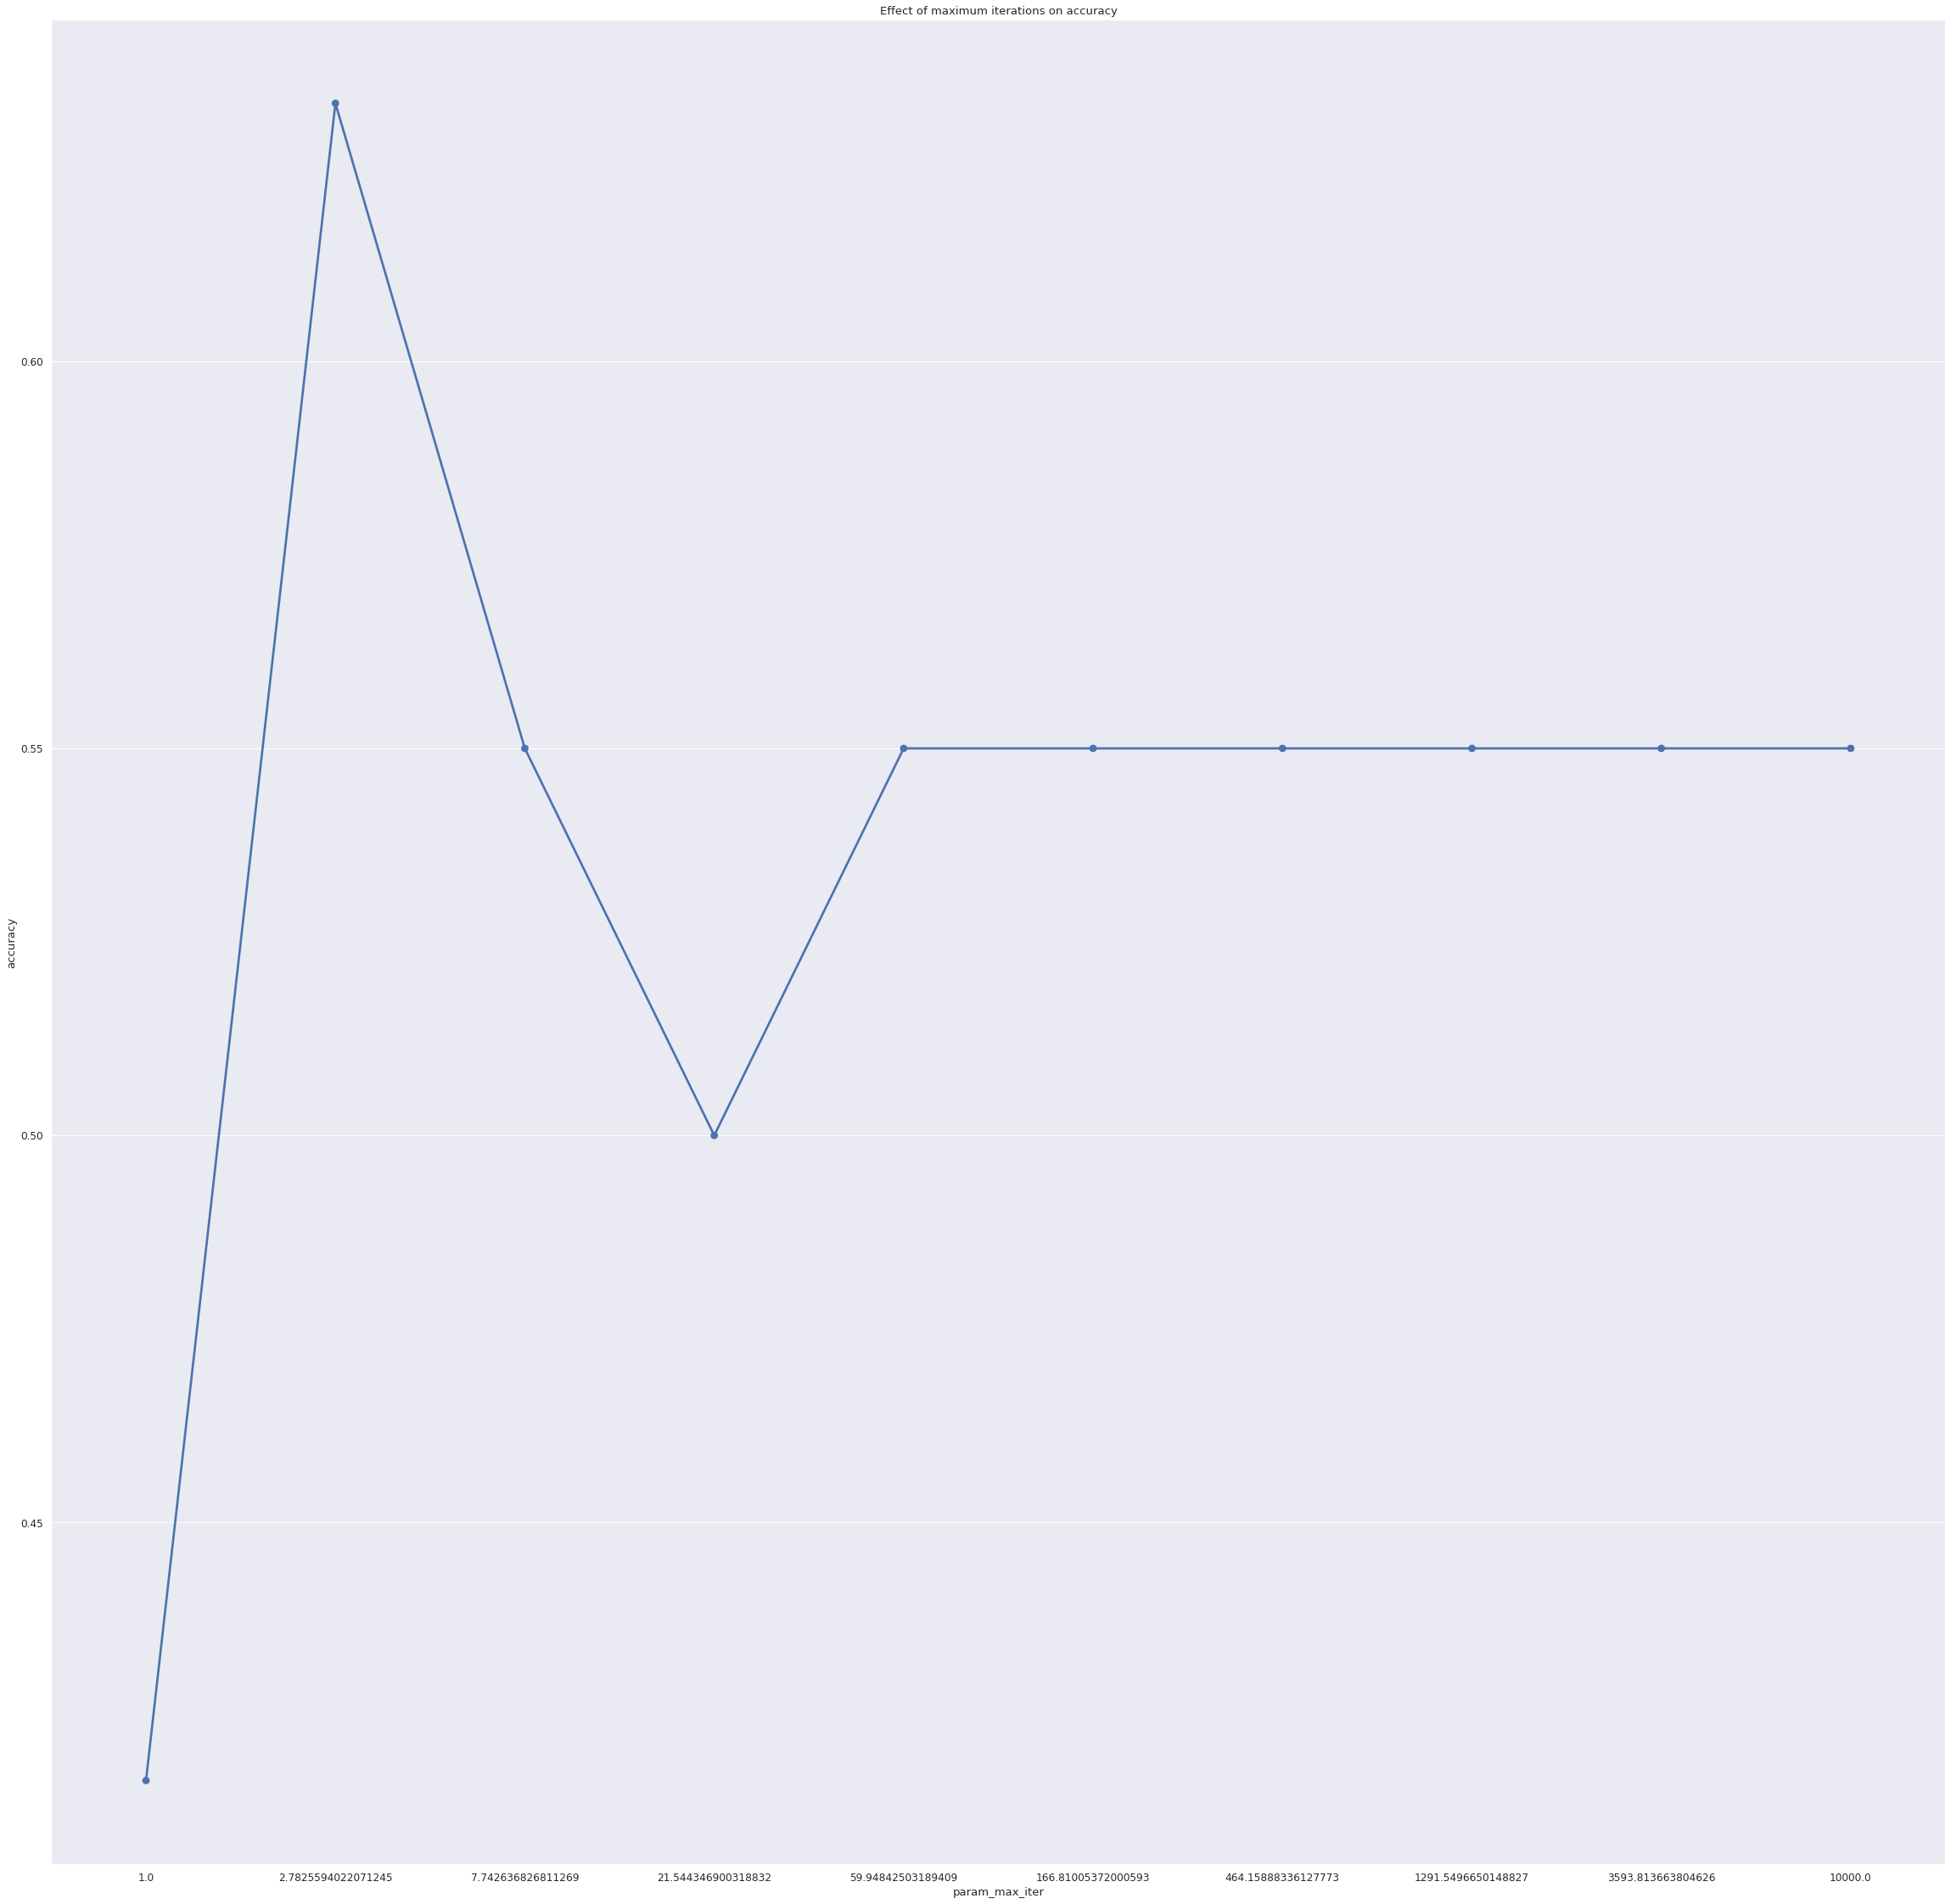

In [65]:
#Perceptron
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
from sklearn.exceptions import ConvergenceWarning
params = {
 'max_iter': np.logspace(0,4,10),
 'alpha': np.logspace(-4,0,10)}

clf = Perceptron()
gcv = GridSearchCV(clf,params,cv=5, scoring="accuracy")
gcv.fit(X_train,y_train.values.ravel())
print("Best Hyperparameters::\n{}".format(gcv.best_params_))
print("Best Estimator::\n{}".format(gcv.best_estimator_))
results = pd.DataFrame(data=gcv.cv_results_)
results['accuracy']=results['mean_test_score']
fig,ax = plt.subplots(figsize=(40,40))

sns.set(font_scale=1.1)

sns.pointplot(data=results[['accuracy',
                           'param_max_iter']],
             y='accuracy',x='param_max_iter',
             ax=ax)
ax.set(title="Effect of maximum iterations on accuracy")
svc=gcv.best_estimator_


y_real = []
predicted = []
def my_scorer(y_true, y_pred):
    y_real.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(svc, X_train, y_train.values.ravel(), cv=5, scoring=make_scorer(my_scorer))
  
print(classification_report(y_real, predicted))

In [49]:
print(svc)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

Perceptron(max_iter=2.7825594022071245)
0.36666666666666664
0.4


Best Hyperparameters::
{'C': 215.44346900318823, 'gamma': 1e-05, 'kernel': 'sigmoid'}
Best Estimator::
SVC(C=215.44346900318823, gamma=1e-05, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        76
           1       0.67      0.41      0.51        44

    accuracy                           0.71       120
   macro avg       0.69      0.65      0.65       120
weighted avg       0.70      0.71      0.69       120



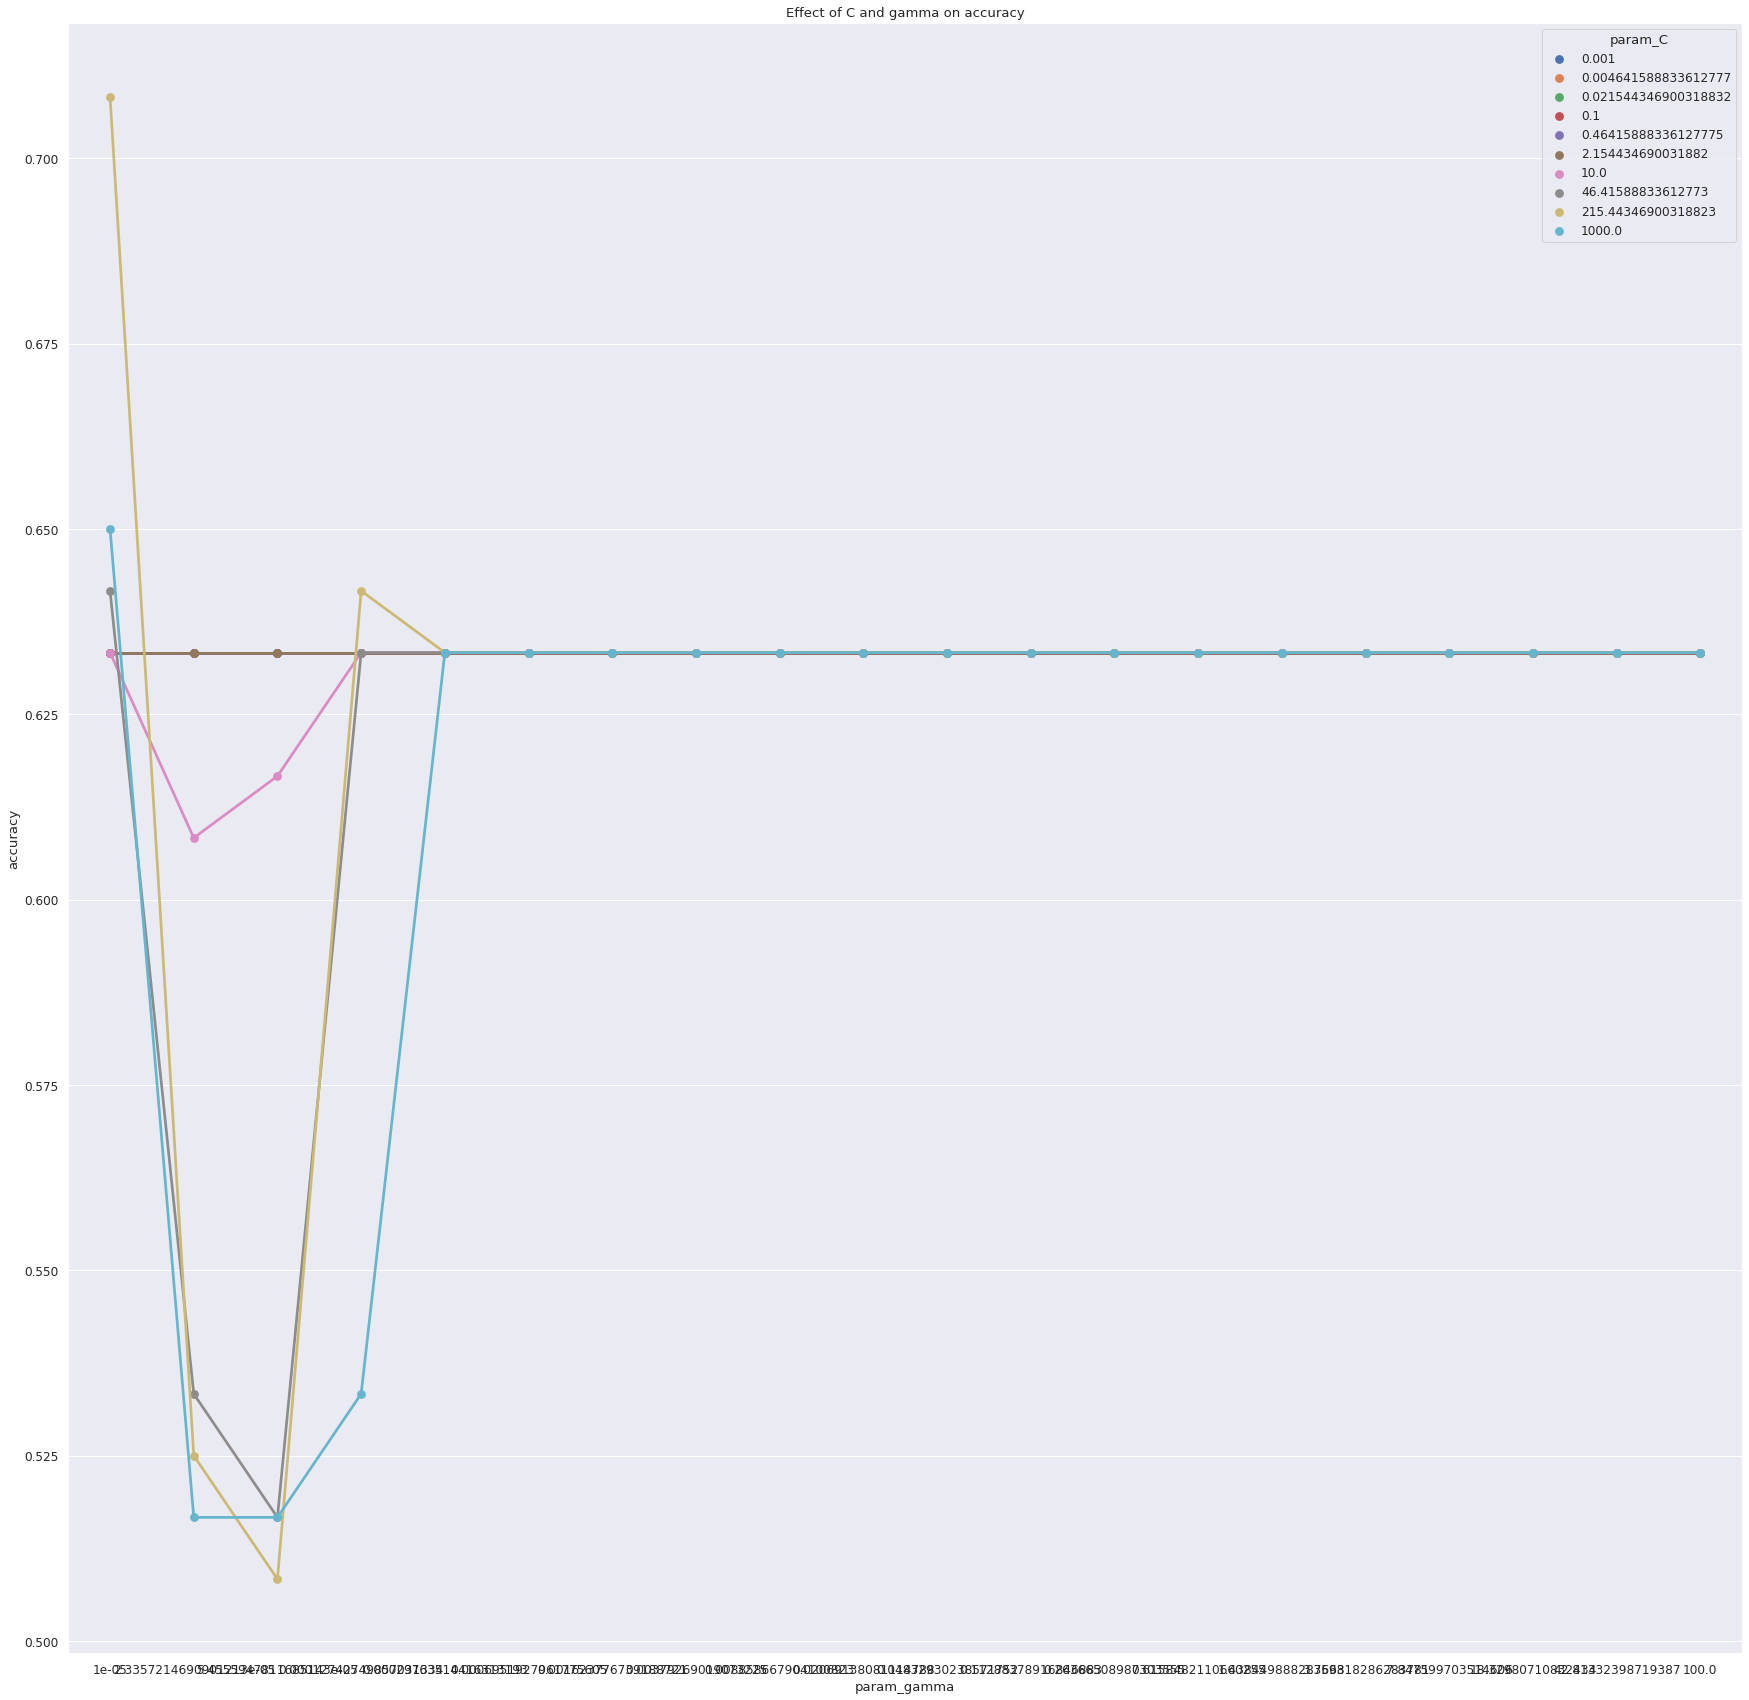

In [41]:
#SUPPORT VECTOR MACHINE:
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
model=SVC()
params = {'C':np.logspace(-3,3,10),
          'gamma':np.logspace(-5,2,20),
          'kernel':['sigmoid']}

gcv = GridSearchCV(SVC(),params,cv=5, scoring="accuracy")
gcv.fit(X_train,y_train.values.ravel())
print("Best Hyperparameters::\n{}".format(gcv.best_params_))
print("Best Estimator::\n{}".format(gcv.best_estimator_))
results = pd.DataFrame(data=gcv.cv_results_)
results['accuracy']=results['mean_test_score']
fig,ax = plt.subplots(figsize=(30,30))

sns.set(font_scale=1.1)

sns.pointplot(data=results[['accuracy',
                           'param_C',
                           'param_gamma']],
             y='accuracy',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="Effect of C and gamma on accuracy")
svc=gcv.best_estimator_

y_real = []
predicted = []
def my_scorer(y_true, y_pred):
    y_real.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(svc, X_train,y_train.values.ravel(), cv=5, scoring=make_scorer(my_scorer))
  
print(classification_report(y_real, predicted))

Best Hyperparameters::
{'C': 1000.0, 'gamma': 4.832930238571752e-06, 'kernel': 'sigmoid'}
Best Estimator::
SVC(C=1000.0, gamma=4.832930238571752e-06, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.79      0.87      0.82        76
           1       0.72      0.59      0.65        44

    accuracy                           0.77       120
   macro avg       0.75      0.73      0.74       120
weighted avg       0.76      0.77      0.76       120



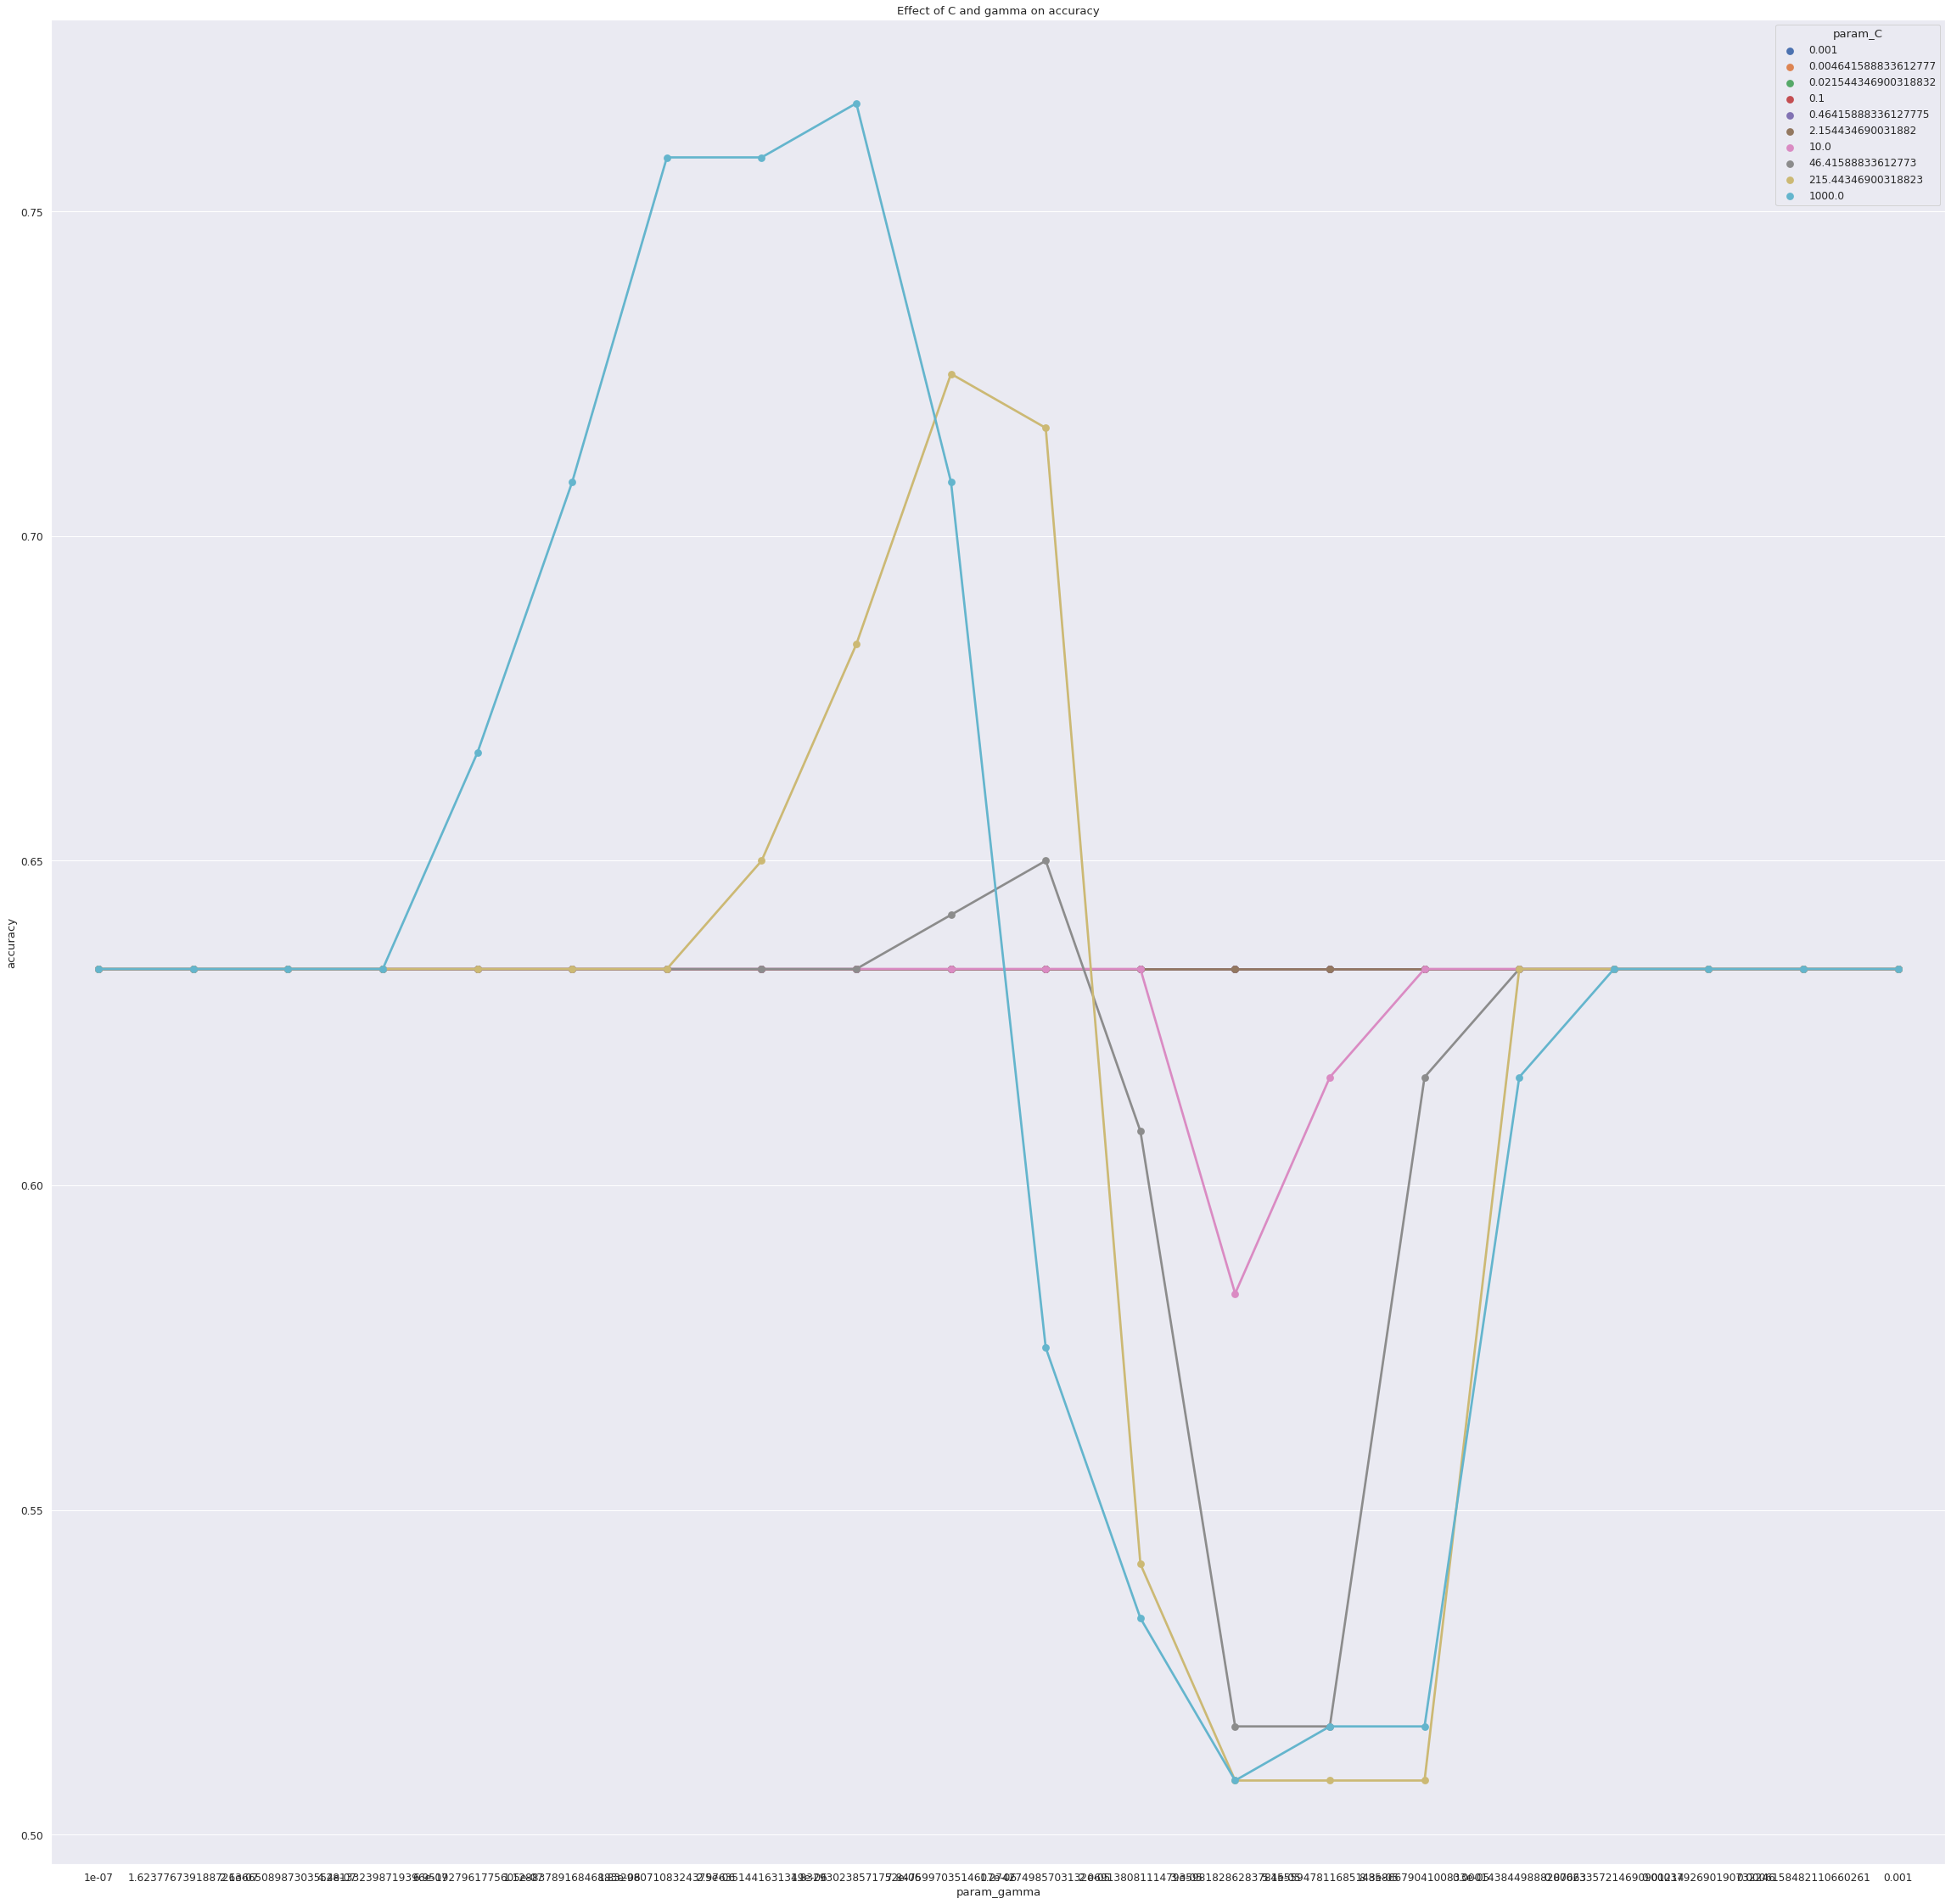

In [42]:

params = {'C':np.logspace(-3,3,10),
          'gamma':np.logspace(-7,-3,20),
          'kernel':['sigmoid']}

gcv = GridSearchCV(SVC(),params,cv=5, scoring="accuracy")
gcv.fit(X_train,y_train.values.ravel())
print("Best Hyperparameters::\n{}".format(gcv.best_params_))
print("Best Estimator::\n{}".format(gcv.best_estimator_))
results = pd.DataFrame(data=gcv.cv_results_)
results['accuracy']=results['mean_test_score']
fig,ax = plt.subplots(figsize=(40,40))

sns.set(font_scale=1.1)

sns.pointplot(data=results[['accuracy',
                           'param_C',
                           'param_gamma']],
             y='accuracy',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="Effect of C and gamma on accuracy")
svc=gcv.best_estimator_

y_real = []
predicted = []
def my_scorer(y_true, y_pred):
    y_real.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(svc, X_train,y_train.values.ravel(), cv=5, scoring=make_scorer(my_scorer))
 
print(classification_report(y_real, predicted))

Best Hyperparameters::
{'C': 1000.0, 'gamma': 4.832930238571752e-06, 'kernel': 'sigmoid'}
Best Estimator::
SVC(C=1000.0, gamma=4.832930238571752e-06, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.79      0.87      0.82        76
           1       0.72      0.59      0.65        44

    accuracy                           0.77       120
   macro avg       0.75      0.73      0.74       120
weighted avg       0.76      0.77      0.76       120



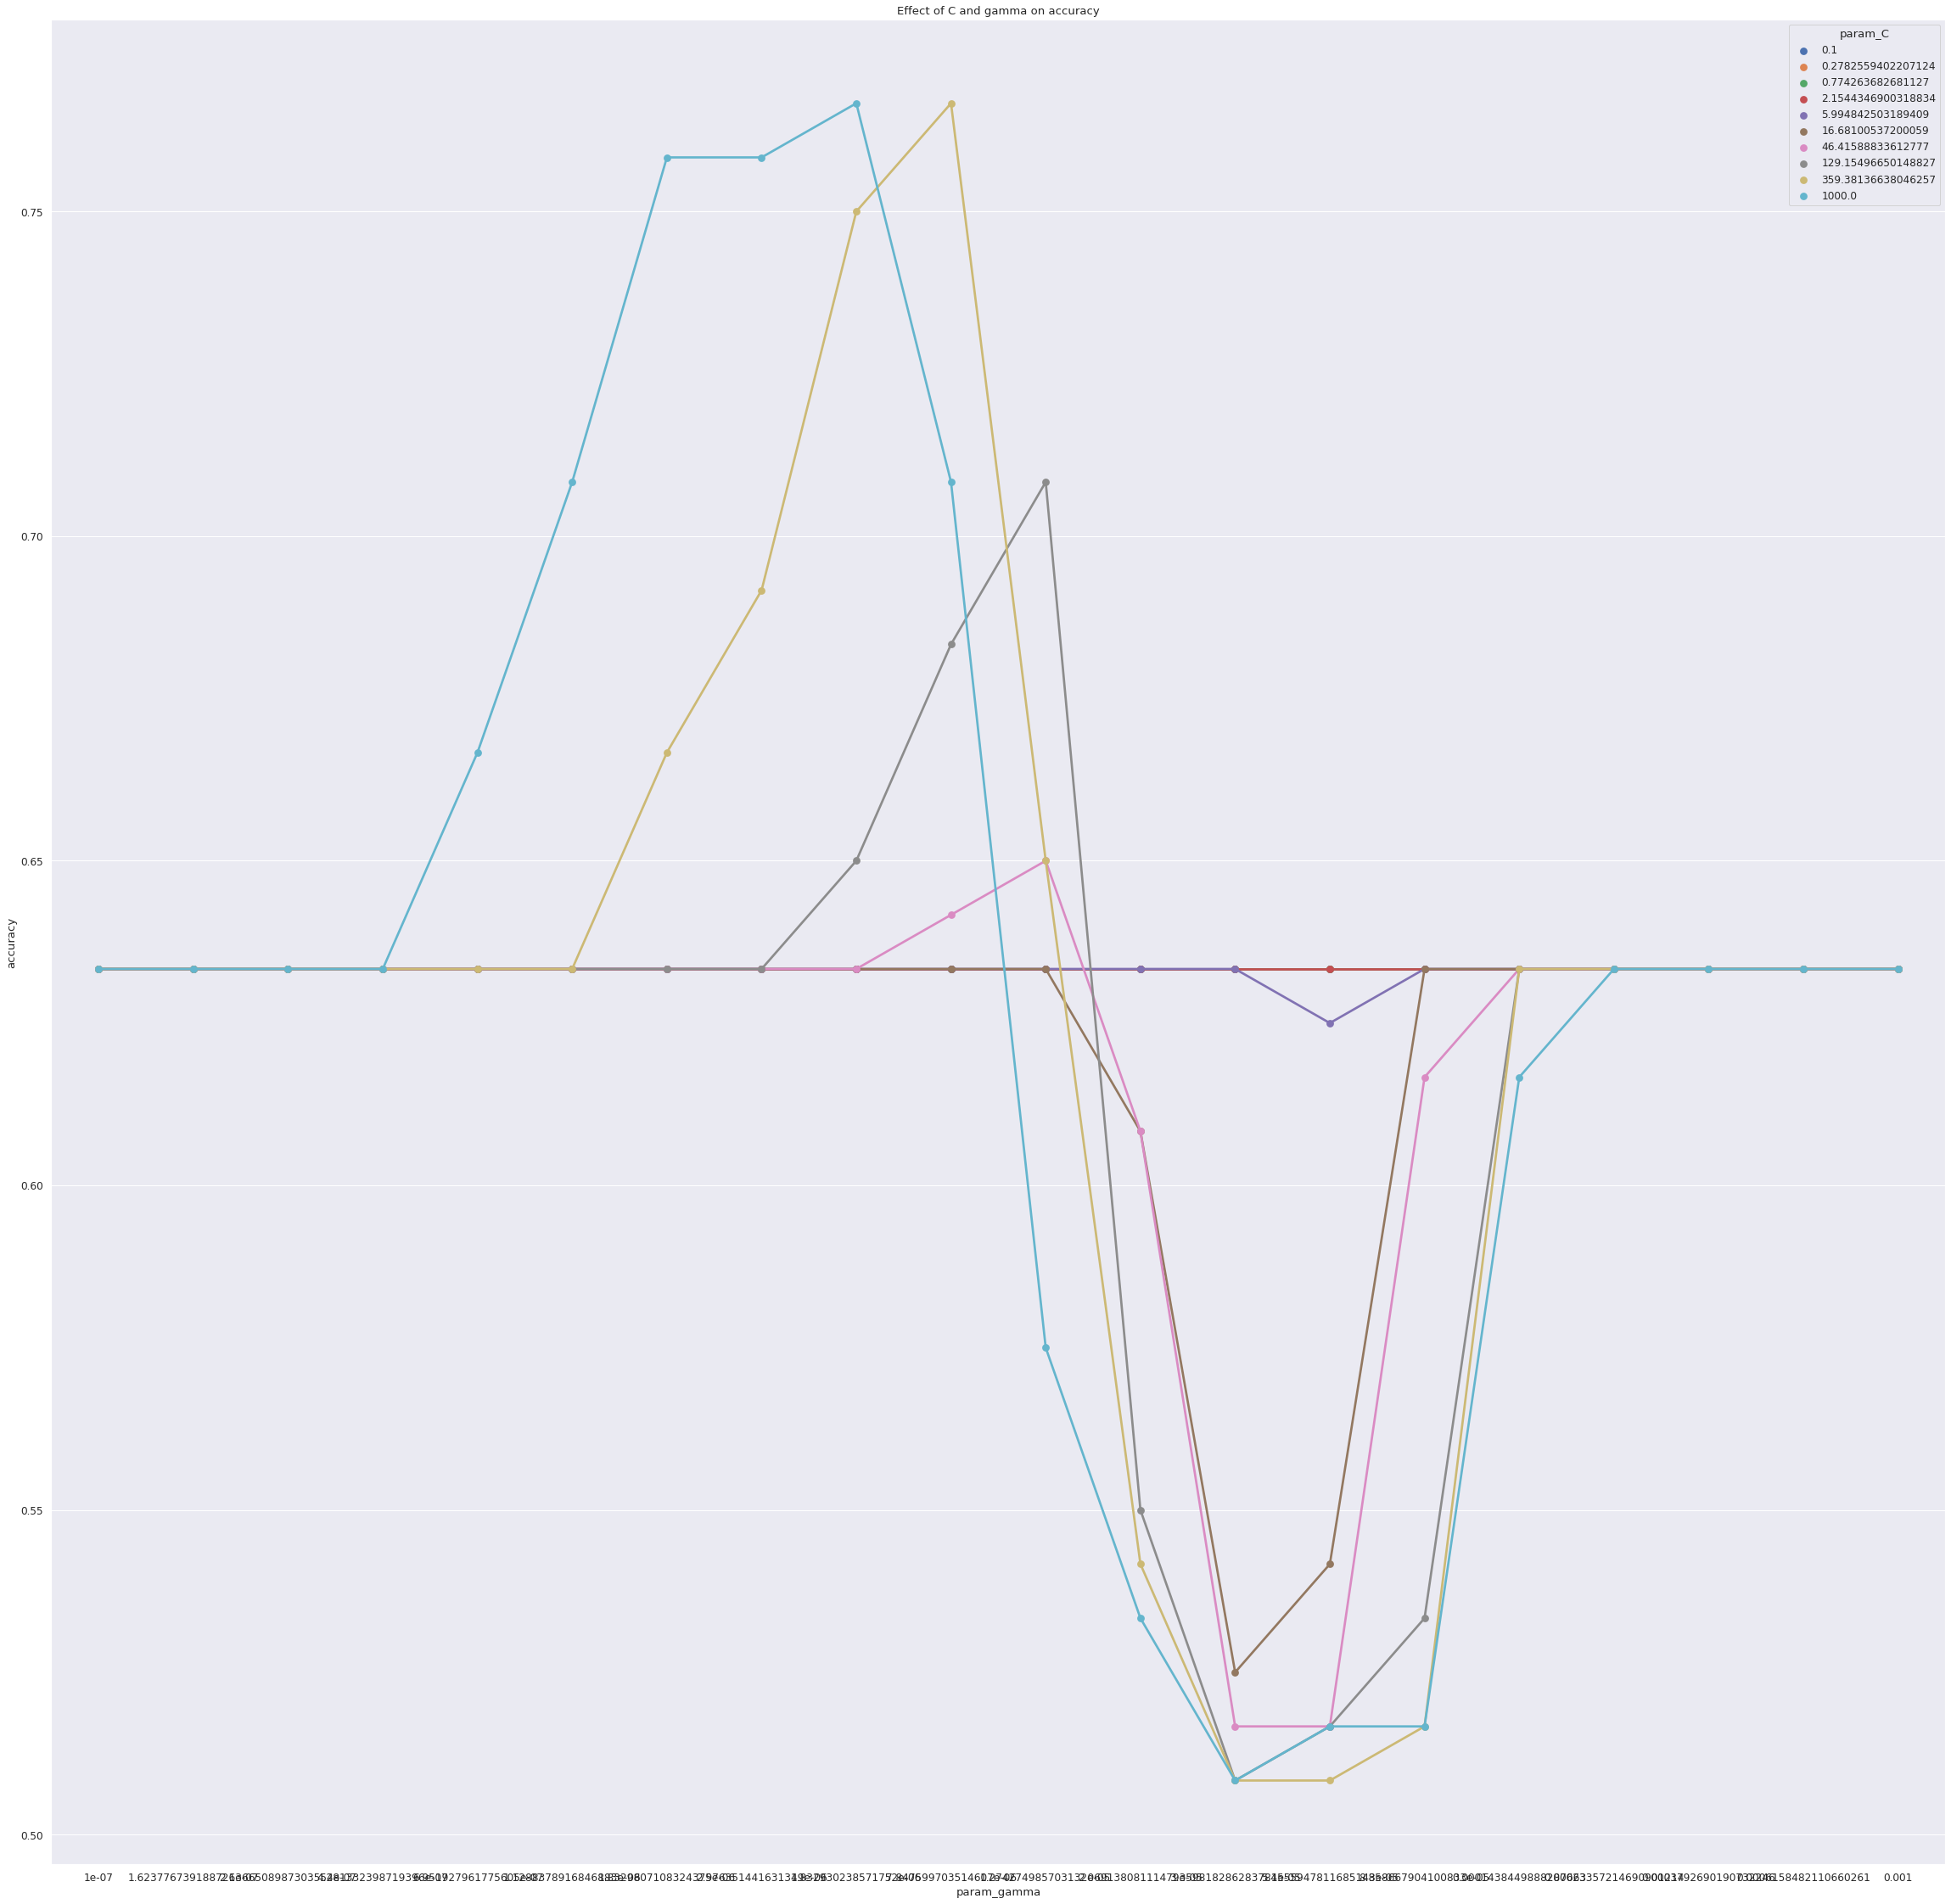

In [43]:

params = {'C':np.logspace(-1,3,10),
          'gamma':np.logspace(-7,-3,20),
          'kernel':['sigmoid']}

gcv = GridSearchCV(SVC(),params,cv=5, scoring="accuracy")
gcv.fit(X_train,y_train.values.ravel())
print("Best Hyperparameters::\n{}".format(gcv.best_params_))
print("Best Estimator::\n{}".format(gcv.best_estimator_))
results = pd.DataFrame(data=gcv.cv_results_)
results['accuracy']=results['mean_test_score']
fig,ax = plt.subplots(figsize=(40,40))

sns.set(font_scale=1.1)

sns.pointplot(data=results[['accuracy',
                           'param_C',
                           'param_gamma']],
             y='accuracy',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="Effect of C and gamma on accuracy")
svc=gcv.best_estimator_

y_real = []
predicted = []

def my_scorer(y_true, y_pred):
    y_real.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)
nested_score = cross_val_score(svc, X_train,y_train.values.ravel(), cv=5, scoring=make_scorer(my_scorer))

print(classification_report(y_real, predicted))

Best Hyperparameters::
{'C': 599.4842503189409, 'gamma': 4.832930238571752e-06, 'kernel': 'sigmoid'}
Best Estimator::
SVC(C=599.4842503189409, gamma=4.832930238571752e-06, kernel='sigmoid')
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        76
           1       0.76      0.59      0.67        44

    accuracy                           0.78       120
   macro avg       0.78      0.74      0.75       120
weighted avg       0.78      0.78      0.78       120



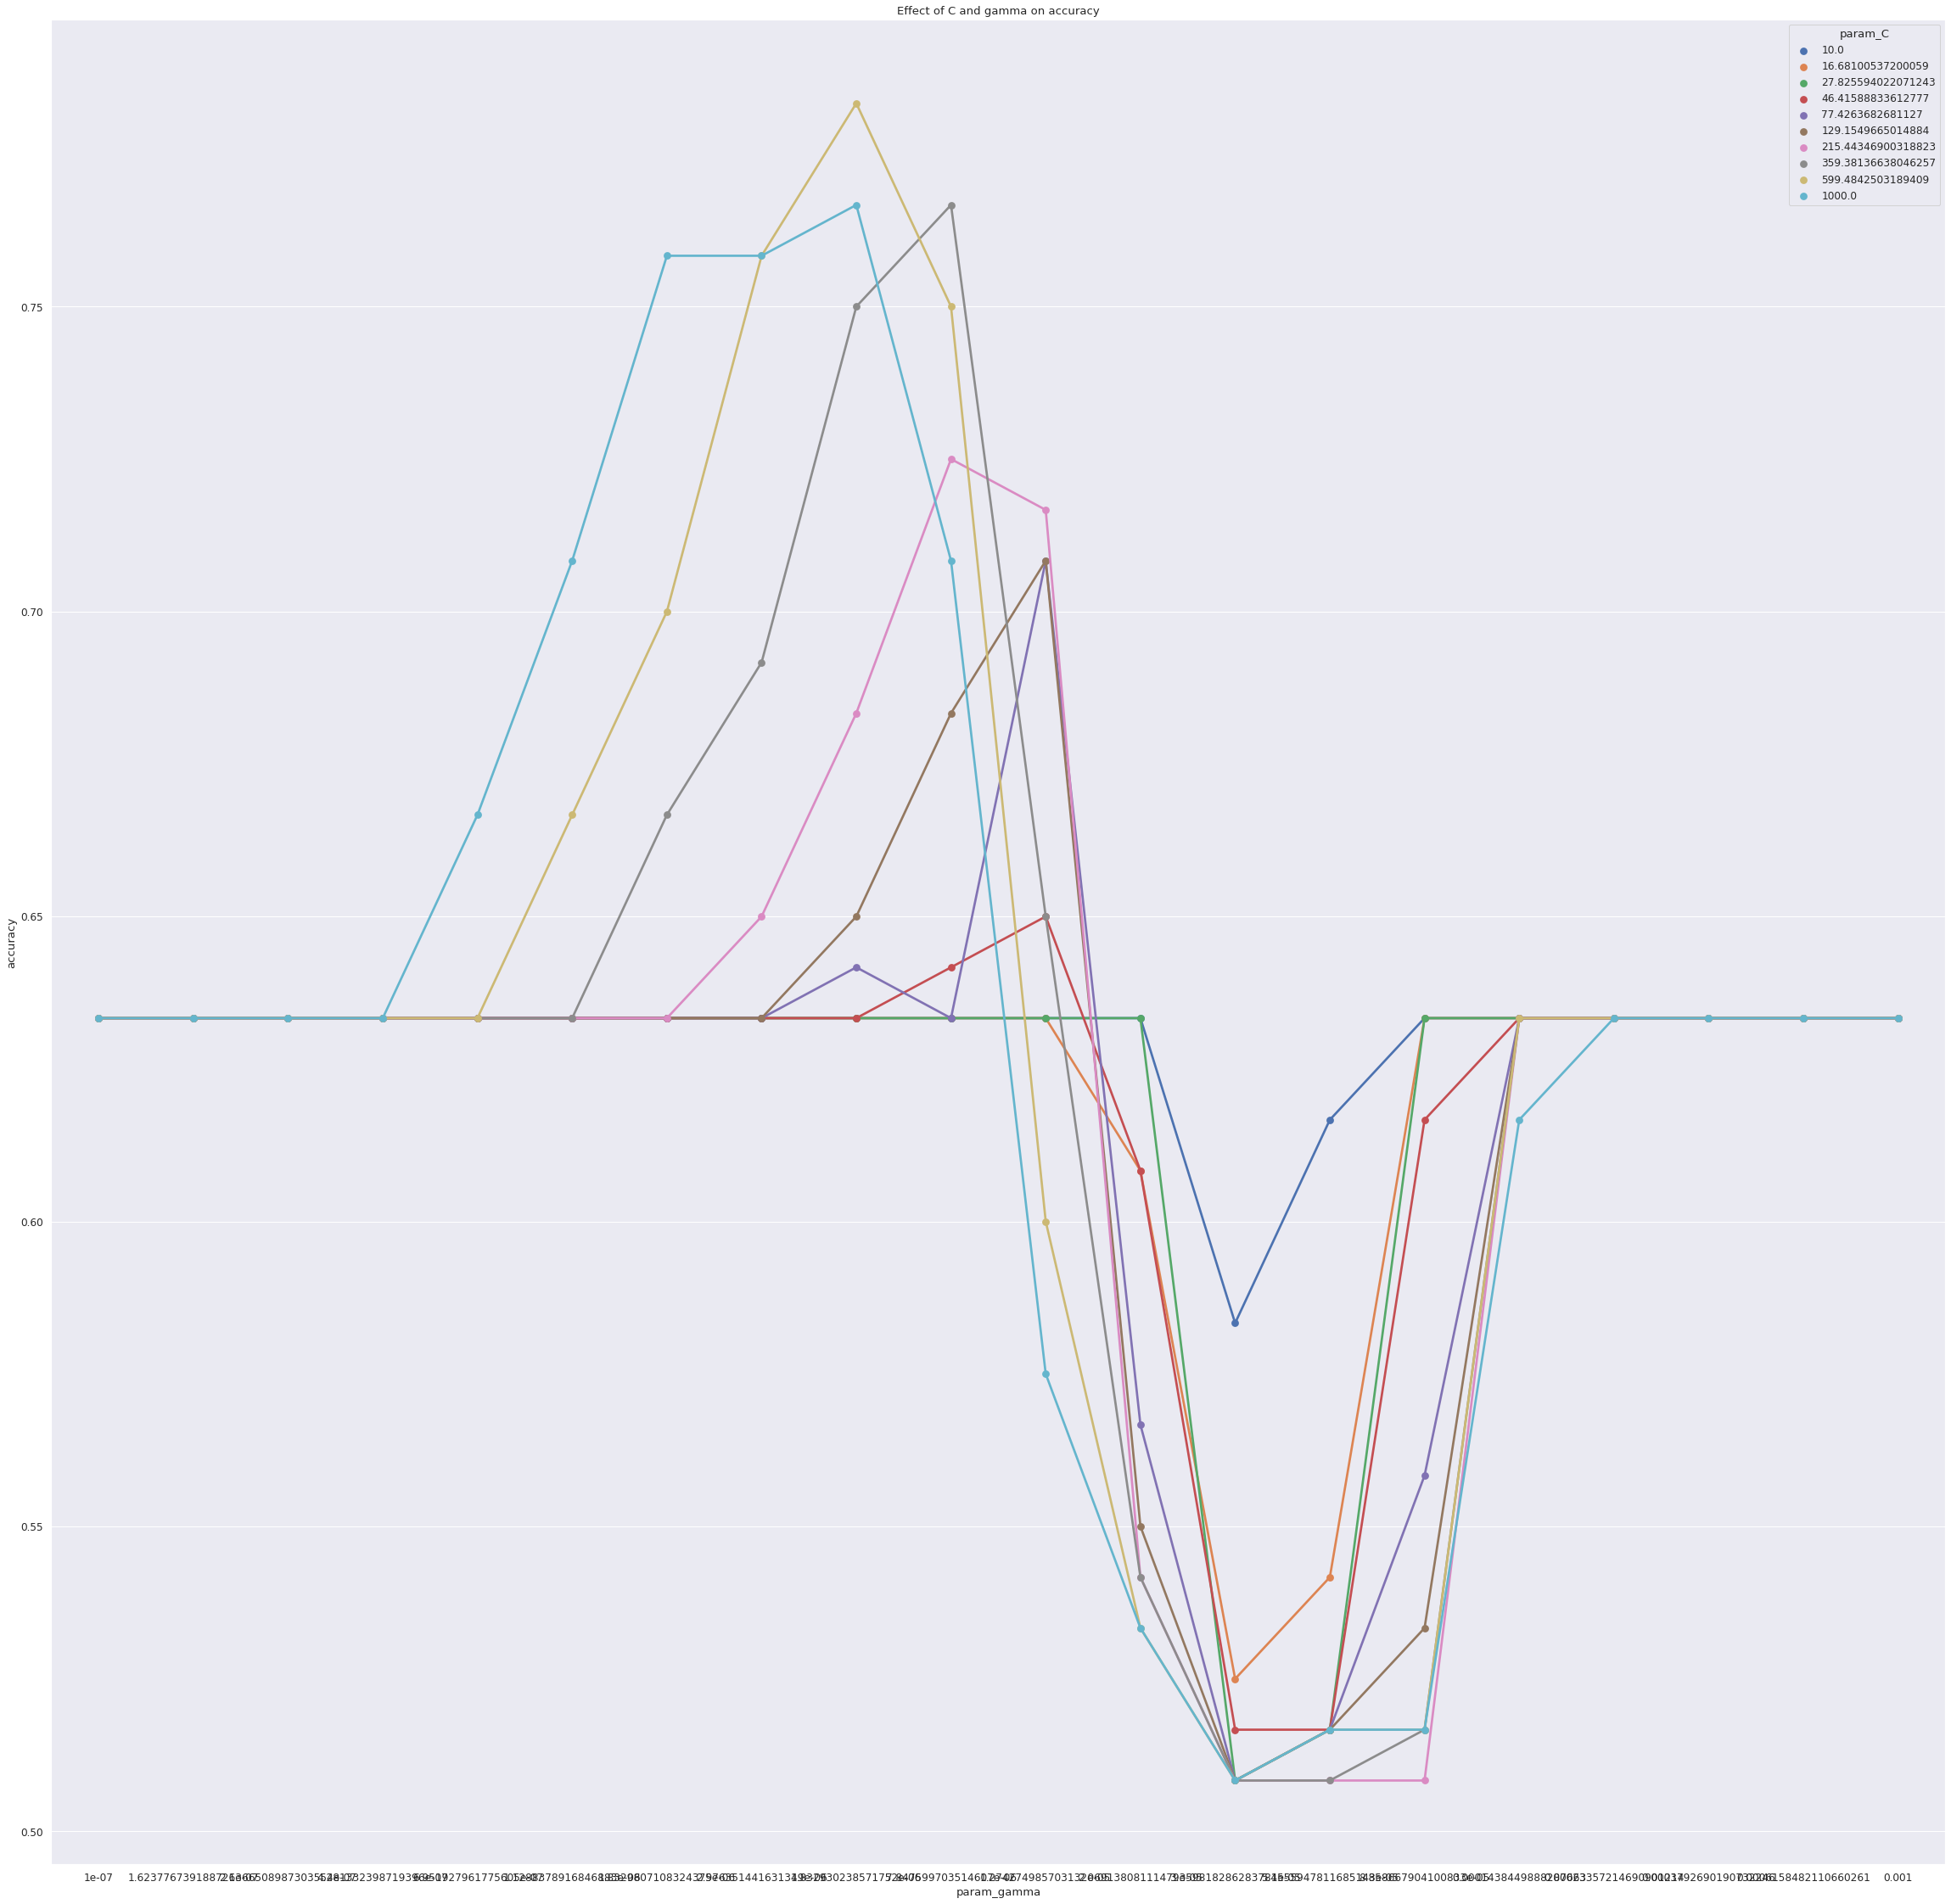

In [44]:

params = {'C':np.logspace(1,3,10),
          'gamma':np.logspace(-7,-3,20),
          'kernel':['sigmoid']}

gcv = GridSearchCV(SVC(),params,cv=5, scoring="accuracy")
gcv.fit(X_train,y_train.values.ravel())
print("Best Hyperparameters::\n{}".format(gcv.best_params_))
print("Best Estimator::\n{}".format(gcv.best_estimator_))
results = pd.DataFrame(data=gcv.cv_results_)
results['accuracy']=results['mean_test_score']
fig,ax = plt.subplots(figsize=(40,40))

sns.set(font_scale=1.1)

sns.pointplot(data=results[['accuracy',
                           'param_C',
                           'param_gamma']],
             y='accuracy',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="Effect of C and gamma on accuracy")
svc=gcv.best_estimator_

y_real = []
predicted = []
def my_scorer(y_true, y_pred):
    y_real.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(svc, X_train,y_train.values.ravel(), cv=5, scoring=make_scorer(my_scorer))

print(classification_report(y_real, predicted))

Best Hyperparameters::
{'C': 421.63157894736844, 'gamma': 4.8e-06, 'kernel': 'sigmoid'}
Best Estimator::
SVC(C=421.63157894736844, gamma=4.8e-06, kernel='sigmoid', random_state=123)
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        76
           1       0.83      0.57      0.68        44

    accuracy                           0.80       120
   macro avg       0.81      0.75      0.77       120
weighted avg       0.81      0.80      0.79       120



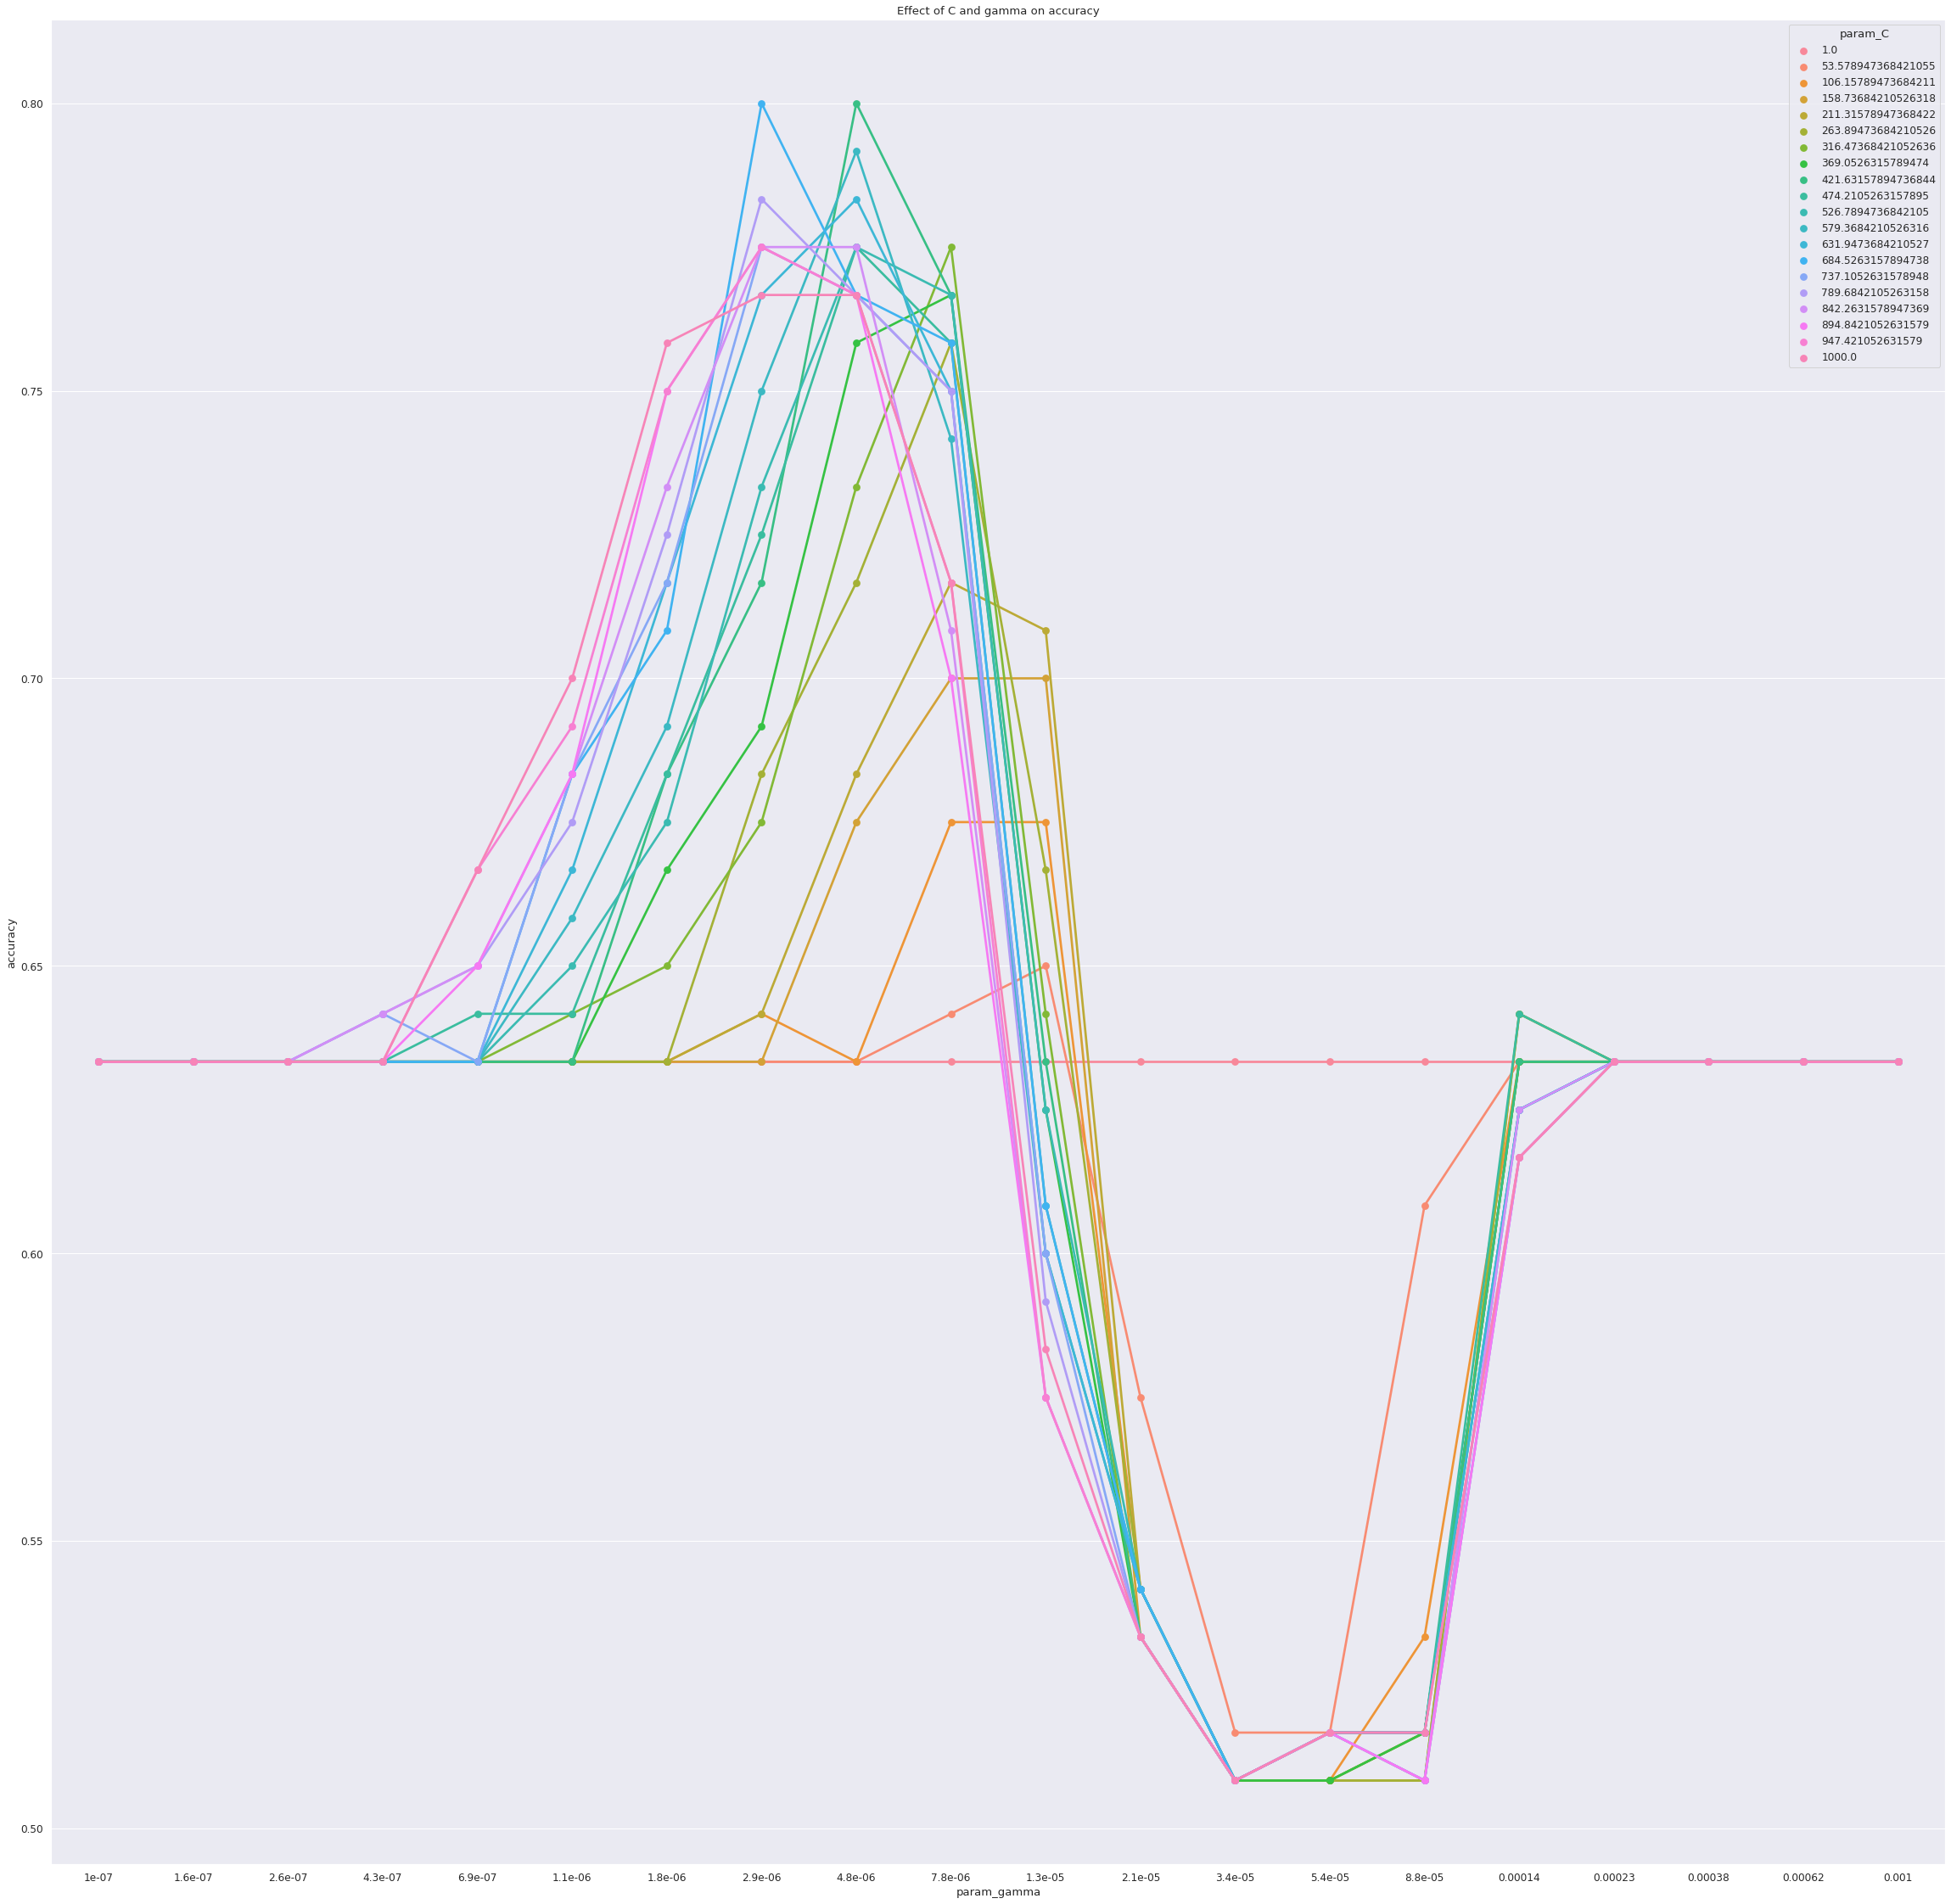

In [72]:

params = {'C':np.linspace(1,1000,20),
          'gamma':[1.0e-07, 1.6e-07, 2.6e-07, 4.3e-07, 6.9e-07, 
      1.1e-06, 1.8e-06, 2.9e-06, 4.8e-06, 7.8e-06, 1.3e-05, 2.1e-05, 3.4e-05, 5.4e-05, 8.8e-05, 0.00014, 0.00023, 0.00038, 0.00062, 0.001],
          'kernel':['sigmoid']}

gcv = GridSearchCV(SVC(random_state=123),params,cv=5, scoring="accuracy")
gcv.fit(X_train,y_train.values.ravel())
print("Best Hyperparameters::\n{}".format(gcv.best_params_))
print("Best Estimator::\n{}".format(gcv.best_estimator_))
results = pd.DataFrame(data=gcv.cv_results_)
results['accuracy']=results['mean_test_score']
fig,ax = plt.subplots(figsize=(40,40))

sns.set(font_scale=1.1)

sns.pointplot(data=results[['accuracy',
                           'param_C',
                           'param_gamma']],
             y='accuracy',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="Effect of C and gamma on accuracy")
svc=gcv.best_estimator_

y_real = []
predicted = []
def my_scorer(y_true, y_pred):
    y_real.extend(y_true)
    predicted.extend(y_pred)
    return accuracy_score(y_true, y_pred)

nested_score = cross_val_score(svc, X_train,y_train.values.ravel(), cv=5, scoring=make_scorer(my_scorer))
 
print(classification_report(y_real, predicted))

In [73]:
print(svc)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

SVC(C=421.63157894736844, gamma=4.8e-06, kernel='sigmoid', random_state=123)
0.8083333333333333
0.6666666666666666
